In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as skl 
from sklearn import datasets

from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [21]:
df = pd.read_csv('Titanic.csv')
df_len = len(df)
df = df.dropna()
df = df.drop(['Name','Ticket','Cabin'],axis=1)
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':1, 'Q':2, 'S':3})
df = df.drop(['PassengerId'],axis = 1)
df_len_2 = len(df)
loss_per = (df_len - df_len_2) / df_len * 100
print('Процент потерянных данных: ', f"{loss_per: .2f}%")
df.iloc[:,1:7]

Процент потерянных данных:   79.46%


,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,1,0,54.0,0,0,51.8625
10,3,1,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542
872,1,0,33.0,0,0,5.0000
879,1,1,56.0,0,1,83.1583
887,1,1,19.0,0,0,30.0000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df['Survived'], test_size=0.3, random_state=0)
t_clf = LogisticRegression(random_state=0,max_iter=10000)

t_clf.fit(X_train,y_train)
y_pred = t_clf.predict(X_test)
score1 = t_clf.score(X_test,y_test) 
y_prob = t_clf.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"ROC AUC:   {roc_auc:.2f}")



Precision: 0.88
Recall:    0.88
F1 Score:  0.88
ROC AUC:   0.86


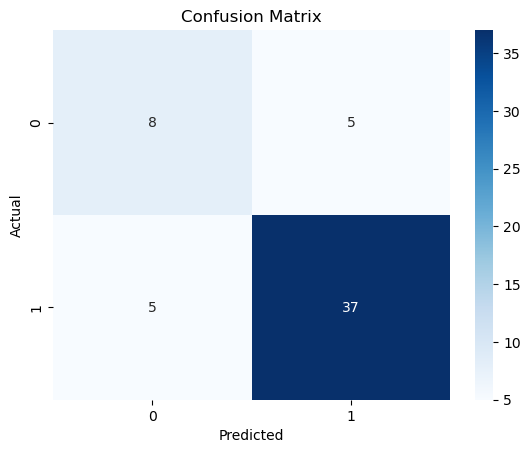

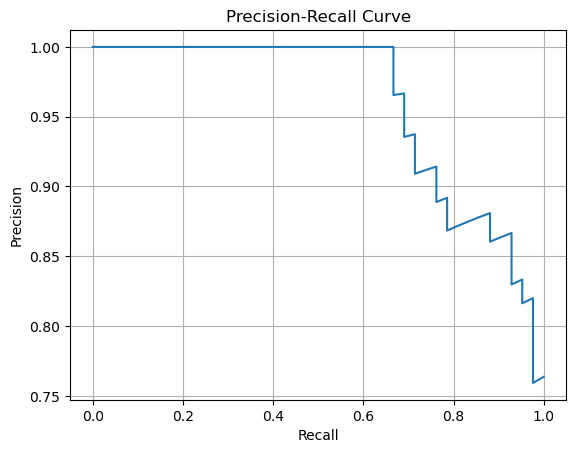

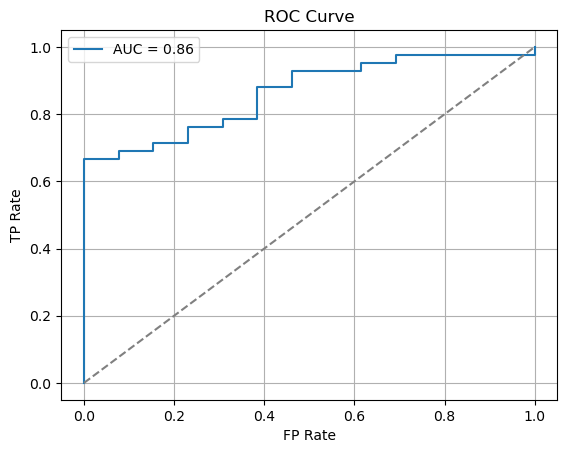

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recalls, precisions)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.legend()
plt.grid()
plt.show()


Precision: 0.76
Recall:    0.98
F1 Score:  0.85
ROC AUC:   0.68


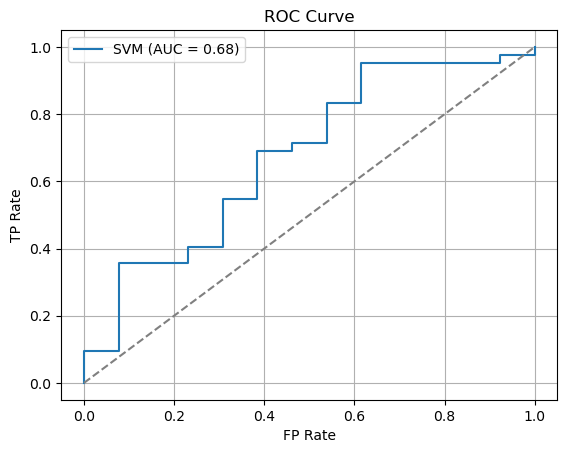

In [27]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

print(f"Precision: {precision_svm:.2f}")
print(f"Recall:    {recall_svm:.2f}")
print(f"F1 Score:  {f1_svm:.2f}")
print(f"ROC AUC:   {roc_auc_svm:.2f}")

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.legend()
plt.grid()
plt.show()

Precision: 0.79
Recall:    0.90
F1 Score:  0.84
ROC AUC:   0.63


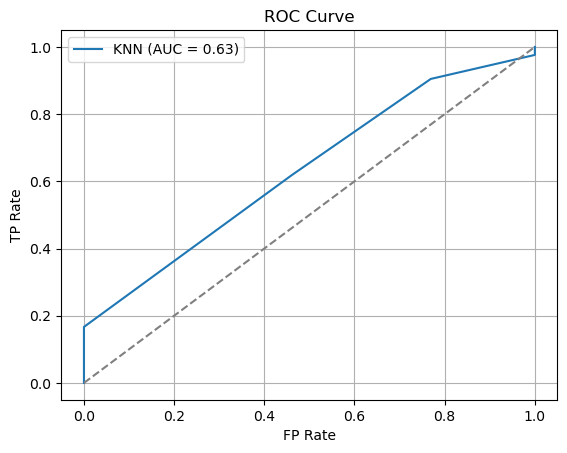

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

print(f"Precision: {precision_knn:.2f}")
print(f"Recall:    {recall_knn:.2f}")
print(f"F1 Score:  {f1_knn:.2f}")
print(f"ROC AUC:   {roc_auc_knn:.2f}")

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.legend()
plt.grid()
plt.show()